# Camera Calibration

## Basics

Some cameras introduce significant distortion to images. Two major kinds of distortion are radial distortion and tangential distortion.

Radial distortion causes straight lines to appear curved. Radial distortion becomes larger the farther points are from the center of the image.

Radial distortion can be represented as follows:<br></br>
$$x_{distorted} = x( 1 + k_1 r^2 + k_2 r^4 + k_3 r^6)$$<br></br>
$$y_{distorted} = y( 1 + k_1 r^2 + k_2 r^4 + k_3 r^6)$$<br></br>

Similarly, tangential distortion occurs because the image-taking lense is not aligned perfectly parallel to the imaging plane. So, some areas in the image may look nearer than expected.

The amount of tangential distortion can be represented as below:<br></br>
$$x_{distorted} = x + [ 2p_1xy + p_2(r^2+2x^2)]$$<br></br>
$$y_{distorted} = y + [ p_1(r^2+ 2y^2)+ 2p_2xy]$$<br></br>

In short, we need to find five parameters, known as distortion coefficients given by:<br></br>
$$ distortion \; coefficients = (k_1 \hspace{5pt} k_2 \hspace{5pt} p_1 \hspace{5pt} p_2 \hspace{5pt} k_3)$$<br></br>

In addition to this, we need to some other information, like the intrinsic and extrinsic parameters of the camera. Intrinsic parameters are specific to a camera. They include information like focal length $(f_x,f_y)$ and optical centers $(c_x,c_y)$. The focal length and optical centers can be used to create a camera matrix, which can be used to remove distortion due to the lenses of a specific camera. The camera matrix is unique to a specific camera, so once calculated, it can be reused on other images taken by the same camera. It is expressed as a 3x3 matrix:<br></br>
$$camera \; matrix = \left [ \begin{matrix} f_x & 0 & c_x \\ 0 & f_y & c_y \\ 0 & 0 & 1 \end{matrix} \right ]$$<br></br>

Extrinsic parameters corresponds to rotation and translation vectors which translates a coordinates of a 3D point to a coordinate system.

For stereo applications, these distortions need to be corrected first.

To find these parameters, we must provide some sample images of a well defined pattern (e.g. a chess board). We find some specific points of which we already know the relative positions (e.g. square corners in the chess board). We know the coordinates of these points in real world space and we know the coordinates in the image, so we can solve for the distortion coefficients. For better results, we need at least 10 test patterns.

![chessboard](../assets/chessboard.jpg)


## Code

As mentioned above, we need at least 10 test patterns for camera calibration.

Consider an image of a chess board with (9 x 6) grid. Take images from a static camera while chess board is placed at different locations and orientations.
![chessboard_pattern](../assets/pattern.jpg)


### Setup


In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import glob


In [ ]:
# termination criteria
subpix_criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

nx = 9 #number of inside corners in x
ny = 6 #number of inside corners in y

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nx*ny, 3), np.float32)
objp[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('../assets/sample_images/left_*.jpg')


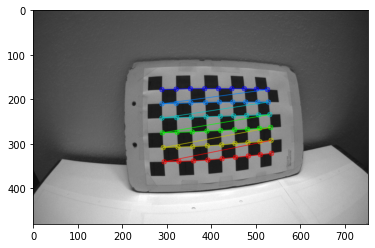

In [ ]:
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (nx, ny), None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        win_size = (11, 11) # Change 'win_size' for accuracy. Default is (11, 11).
        corners = cv.cornerSubPix(gray, corners, win_size, (-1, -1), subpix_criteria)
        imgpoints.append(corners)

        # Draw and display the corners
        cv.drawChessboardCorners(img, (nx, ny), corners, ret)
        plt.imshow(img)
        

### Calibration

If 'rms' value is in between 0 and 1 then it is considered as good calibration.


In [ ]:
rms, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

print("RMS value = ", rms)


RMS value =  0.13568200537667935


### Undistortion


In [ ]:
img = cv.imread('../assets/sample_images/left_12.jpg')

undistorted = cv.undistort(img, mtx, dist, None, mtx)


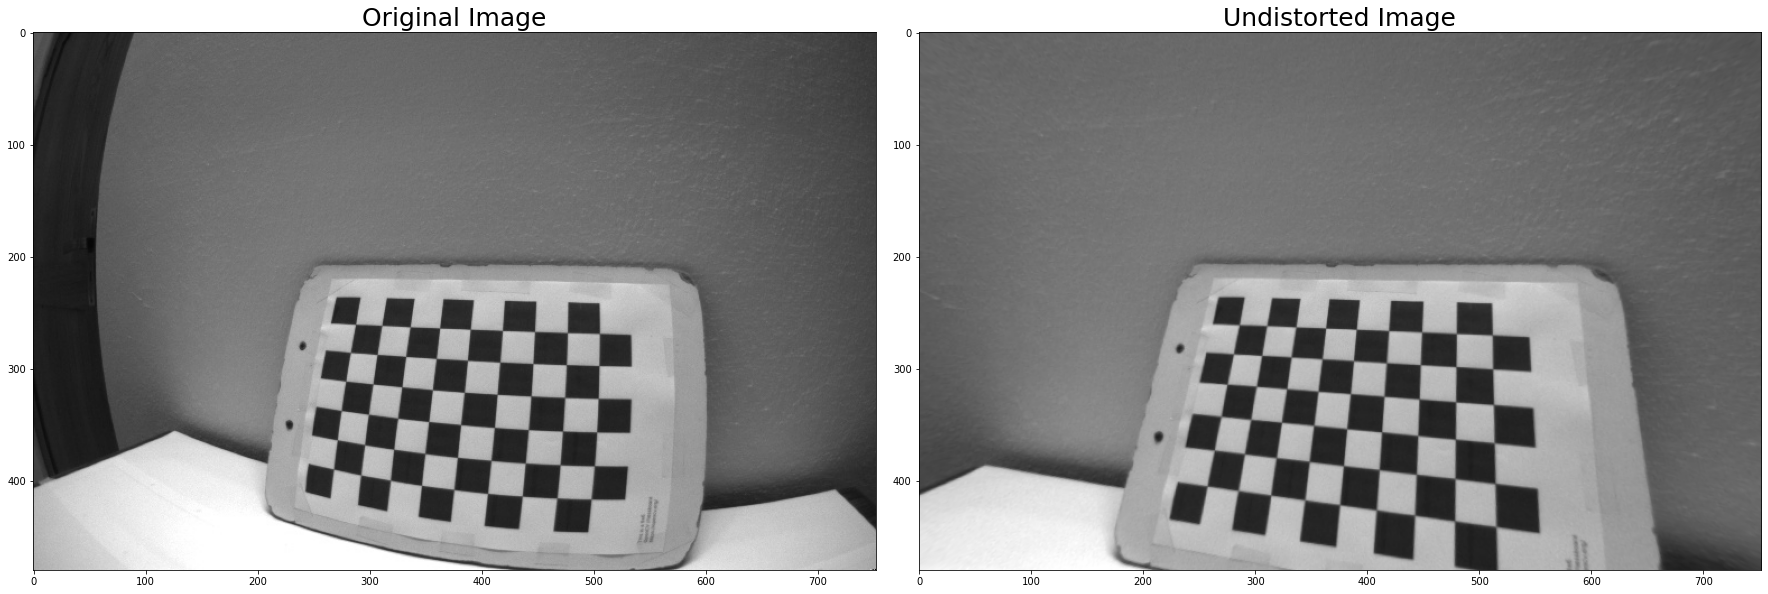

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize = 25)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize = 25)
plt.subplots_adjust(left = 0., right = 1, top = 0.9, bottom = 0.)
